In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from timefusion import TimeFusion
import random
import torch
from torch import nn


In [2]:
# Create dataset of two correlated, random walks on top of sine functions
# Set random seed to make result reproducible
np.random.seed(0)

# Random walk starts at 0,0
z = np.array([0,0])

# Covariance matrix for normal distribution
cov = [
    [1, 0.5],
    [0.5, 1]
]

# List to hold samples
samples = []

for i in range(30000):

    # Calculate underlying sine values
    y = 1*np.array([np.sin(0.04*i),np.sin((0.06*i + 1))])
    #y = 1*np.array([np.sin(0.04*i),np.sin(0.04*i)])

    # Draw random samples from normal distribution
    #z = np.random.multivariate_normal(z,cov)
    z = np.array([0,0])

    # Store samples
    samples.append(y + z)

# Create pandas DataFrame out of data
data = pd.DataFrame(data=samples,columns=["sine1","sine2"])

# Remove 50% of samples to make into an irregular time-series
keep = 1 # What fraction of cells to keep
mask = [False]*int(2*len(data)*keep) + [True]*int(2*len(data)*(1-keep))
random.shuffle(mask)
mask = np.array(mask).reshape((len(data),2))
data = data.mask(mask)

# Remove all rows without any data
data = data.dropna(axis = 0, how = 'all')


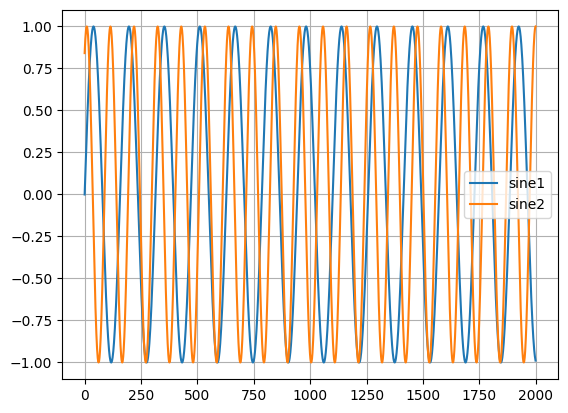

In [3]:
# Plot data so we can inspect it
data[:2000].plot()
plt.grid(True)

In [4]:
predictor = TimeFusion(
    datapoint_dim = 4,
    context_length = 50,
    prediction_length = 10,
    start_length = 10,
    indices = [1,2,3],
    timestamps = [],
    device = torch.device("mps"),
    diff_steps=50,
    dim_feedforward=128,
    num_decoder_layers=2,
    num_encoder_layers=2,
    nhead=1,
    d_model=256,
)

In [5]:
print("Number of trainable parameters:",sum(p.numel() for p in predictor.parameters()))

Number of trainable parameters: 24442498


In [6]:
predictor.train(
    train_data=data[data.index <= 2900],
    epochs=45,
    val_data=data[data.index > 29000],
    val_metrics= {
        "Val MAE": nn.L1Loss(),
        "Val MSE": nn.MSELoss()
    },
    optimizer=torch.optim.Adam(params=predictor.parameters(),lr=1e-4)
)

In [49]:
torch.empty(size=(4,4)).normal_()

tensor([[-1.9459, -0.1720, -0.7551, -0.1928],
        [-0.3263,  2.3417,  0.8495, -1.3689],
        [-0.4629,  0.6341, -2.5056, -0.8853],
        [ 0.0222,  0.3008,  0.5426, -2.1165]])

In [7]:
#torch.save(predictor.state_dict(), "weights")
predictor.load_state_dict(torch.load("weights"))
#predictor.eval()

<All keys matched successfully>

In [28]:
predictor.betas

array([0.0001    , 0.00110909, 0.00211818, 0.00312727, 0.00413636,
       0.00514545, 0.00615455, 0.00716364, 0.00817273, 0.00918182,
       0.01019091, 0.0112    , 0.01220909, 0.01321818, 0.01422727,
       0.01523636, 0.01624545, 0.01725455, 0.01826364, 0.01927273,
       0.02028182, 0.02129091, 0.0223    , 0.02330909, 0.02431818,
       0.02532727, 0.02633636, 0.02734545, 0.02835455, 0.02936364,
       0.03037273, 0.03138182, 0.03239091, 0.0334    , 0.03440909,
       0.03541818, 0.03642727, 0.03743636, 0.03844545, 0.03945455,
       0.04046364, 0.04147273, 0.04248182, 0.04349091, 0.0445    ,
       0.04550909, 0.04651818, 0.04752727, 0.04853636, 0.04954545,
       0.05055455, 0.05156364, 0.05257273, 0.05358182, 0.05459091,
       0.0556    , 0.05660909, 0.05761818, 0.05862727, 0.05963636,
       0.06064545, 0.06165455, 0.06266364, 0.06367273, 0.06468182,
       0.06569091, 0.0667    , 0.06770909, 0.06871818, 0.06972727,
       0.07073636, 0.07174545, 0.07275455, 0.07376364, 0.07477

In [27]:
predictor.bar_alphas[-2]

0.0062430677993041426

In [30]:
samples, iterations,iterations2 = predictor.sample(
    data=data[data.index <= 1400],
    num_samples=1,
    batch_size=1
)

In [31]:
samples

tensor([[[[-7.8869e-01, -9.0000e+00,  4.0000e+01,  0.0000e+00],
          [-7.6347e-01, -8.0000e+00,  4.1000e+01,  0.0000e+00],
          [-7.3703e-01, -7.0000e+00,  4.2000e+01,  0.0000e+00],
          [-7.0941e-01, -6.0000e+00,  4.3000e+01,  0.0000e+00],
          [-6.8066e-01, -5.0000e+00,  4.4000e+01,  0.0000e+00],
          [-6.5082e-01, -4.0000e+00,  4.5000e+01,  0.0000e+00],
          [-6.1994e-01, -3.0000e+00,  4.6000e+01,  0.0000e+00],
          [-5.8807e-01, -2.0000e+00,  4.7000e+01,  0.0000e+00],
          [-5.5525e-01, -1.0000e+00,  4.8000e+01,  0.0000e+00],
          [-5.2155e-01,  0.0000e+00,  4.9000e+01,  0.0000e+00],
          [-9.4072e+00,  1.0000e+00,  5.0000e+01,  1.0000e+00],
          [ 5.6106e+00,  2.0000e+00,  5.1000e+01,  1.0000e+00],
          [ 7.3746e+00,  3.0000e+00,  5.2000e+01,  1.0000e+00],
          [-1.1700e+01,  4.0000e+00,  5.3000e+01,  1.0000e+00],
          [ 7.8825e-01,  5.0000e+00,  5.4000e+01,  1.0000e+00],
          [ 1.8438e+00,  6.0000e+00,  5.

In [24]:
iterations2.shape
iterations2[1,0]

tensor([ 1.8971e-03,  3.5327e-01, -2.7242e-01,  1.1559e+00,  1.0952e+00,
         2.0749e+00, -3.8524e-01, -3.2068e-01, -5.5900e-01,  1.2286e-01],
       device='mps:0')

In [29]:
iterations[1,0]

tensor([[ 5.0239e-02, -9.0000e+00,  4.0000e+01,  0.0000e+00],
        [ 1.0260e-02, -8.0000e+00,  4.1000e+01,  0.0000e+00],
        [-2.9735e-02, -7.0000e+00,  4.2000e+01,  0.0000e+00],
        [-6.9683e-02, -6.0000e+00,  4.3000e+01,  0.0000e+00],
        [-1.0952e-01, -5.0000e+00,  4.4000e+01,  0.0000e+00],
        [-1.4918e-01, -4.0000e+00,  4.5000e+01,  0.0000e+00],
        [-1.8860e-01, -3.0000e+00,  4.6000e+01,  0.0000e+00],
        [-2.2772e-01, -2.0000e+00,  4.7000e+01,  0.0000e+00],
        [-2.6648e-01, -1.0000e+00,  4.8000e+01,  0.0000e+00],
        [-3.0481e-01,  0.0000e+00,  4.9000e+01,  0.0000e+00],
        [-8.2487e-01,  1.0000e+00,  5.0000e+01,  9.9000e+01],
        [ 1.0549e+00,  2.0000e+00,  5.1000e+01,  9.9000e+01],
        [-1.8016e+00,  3.0000e+00,  5.2000e+01,  9.9000e+01],
        [ 1.0655e+00,  4.0000e+00,  5.3000e+01,  9.9000e+01],
        [ 7.3986e-01,  5.0000e+00,  5.4000e+01,  9.9000e+01],
        [ 1.7456e+00,  6.0000e+00,  5.5000e+01,  9.9000e+01],
        

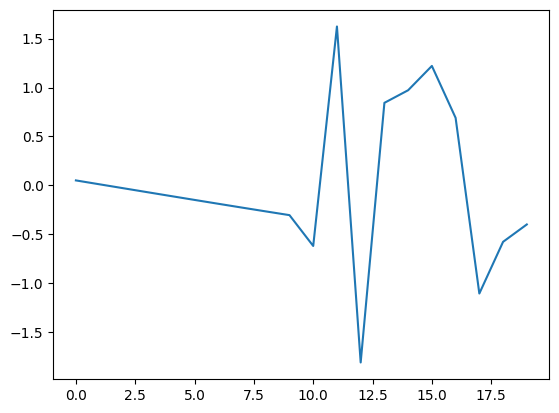

In [11]:
values = samples[:,:,:,0]
#plt.plot(values[1,1].cpu())
#plt.plot(values[0,1].cpu())
#plt.plot(iterations[99,0,:,0].cpu())

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for i in range(100):
    ax.clear()
    ax.plot(iterations[i,0,:,0].cpu())
    plt.pause(0.1)

In [12]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)

<IPython.core.display.Javascript object>

In [13]:
from diffusion import BatchLoader
val_loader = BatchLoader(
    device = predictor.device,
    data = data.iloc[-500:], 
    batch_size = 1, 
    context_length = predictor.context_length,
    prediction_length = predictor.prediction_length,
    start_length=predictor.start_length,
    diff_steps = predictor.diff_steps
)

In [14]:

# Plot one example from the validation set
with torch.no_grad():

    for i, batch in enumerate(val_loader, start = 1):
        context, queries, targets = batch
        predictions = predictor(context,queries)
        break
    

plt.plot(context[0,0,:,1].cpu(),context[0,0,:,0].cpu(),"-o")
plt.plot(queries[0,0,predictor.start_length:,1].cpu(),predictions[0,0].cpu(),"-o")
plt.plot(context[0,1,:,1].cpu(),context[0,1,:,0].cpu(),"-o")
plt.plot(queries[0,1,predictor.start_length:,1].cpu(),predictions[0,1].cpu(),"-o")

<IPython.core.display.Javascript object>

In [15]:
queries[0,1,predictor.start_length:,1]

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], device='mps:0')

In [16]:
queries[0,0,10:,1]

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], device='mps:0')

In [17]:
context[0,0,:,1]

tensor([-50., -49., -48., -47., -46., -45., -44., -43., -42., -41., -40., -39.,
        -38., -37., -36., -35., -34., -33., -32., -31., -30., -29., -28., -27.,
        -26., -25., -24., -23., -22., -21., -20., -19., -18., -17., -16., -15.,
        -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,
         -2.,  -1.], device='mps:0')

In [18]:
from diffusion import BatchLoader

%load_ext line_profiler

def f():
    BatchLoader(
        data = data[data.index < 300],
        context_length = 20,
        prediction_length = 20,
        start_length = 10
    )


%lprun -f BatchLoader.__init__ f()

# for i, batch in enumerate(train_loader, start = 1):
#     a,b,c = batch
#     print(a.shape,b.shape,c.shape)

Timer unit: 1e-09 s

Total time: 0.170718 s
File: /Users/edvard/Documents/Imperial College/Year 4/Final Year Project/Final-Year-Project/TimeFusion/diffusion.py
Function: __init__ at line 15

Line #      Hits         Time  Per Hit   % Time  Line Contents
    15                                               def __init__(
    16                                                   self,
    17                                                   data: pd.DataFrame, 
    18                                                   context_length: int,
    19                                                   prediction_length: int,
    20                                                   start_length: int = 0,
    21                                                   batch_size: int = 64, 
    22                                                   diff_steps: int = 100,
    23                                                   betas: List[float] = None,
    24                                                 

In [19]:
list(pd.Series(range(len(data)))[pd.Series(data.index).between(1000,1008)])

[1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008]

In [20]:
a = torch.tensor([1,2,3])

In [21]:
a[:] = 1

In [22]:
a

tensor([1, 1, 1])